# Аналитика данных с помощью pandas и matplotlib

В этом задании вам предлагается выполнить анализ данных криптовалют с помощью библиотек pandas и matplotlib.
Задание выглядит как лабораторная работа, в которой вам предстоит заполнить недостающие клетки и ответить на ряд вопросов.

Минимальные баллы для зачёта по этой работе - 3 балла. Если вы не набираете тут 3 балла, то по всему курсу вы получаете неуд<br> (см. слайды с семинара №1)

 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация по matplotlib](https://matplotlib.org/index.html)

## 1. Данные (2 балла)

Начнем с необходимых приготовлений.

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl  
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е

%matplotlib inline

#### Загрузите заранее подготовленный датасет из файла "coins.csv". Создайте объект типа pandas.DataFrame с именем coins и в качестве индекса выберите колонку с датой.

In [3]:
coins = pd.read_csv('coins.csv', index_col='date')

Посмотрим что получилось

In [4]:
coins.head(4)

,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
date,,,,,,,,,,,,
2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07


Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

#### Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):
#### 1. Сколько всего различных монет представлено в датасете? (0.4 балла)

In [59]:
len(coins.groupby(['name']))


70

#### 2. За какой период данные мы имеем? (0.4 балла)

In [24]:
print ('From {} to {}. Total: {} days.'.format(coins.axes[0][0], coins.axes[0][len(coins) - 1], 
      (pd.to_datetime(coins.axes[0][len(coins) - 1]) - pd.to_datetime(coins.axes[0][0])).days + 1))

From 2013-04-28 to 2018-06-06. Total: 1866 days.


#### 3. Есть ли пропуски в данных? Какой природы эти пропуски? (0.5 балла)

In [47]:
print ('Missings in: ')
print ((len(coins) - coins.count())[len(coins) > coins.count()])

Missings in: 
price               327
txCount            1520
txVolume           1830
activeAddresses    1520
dtype: int64


#### 4. У какой монеты и когда была самая высокая цена? (0.2 балла)

In [44]:
print ('The highest price at day: ')
print (coins['name'][coins['high'] == coins['high'].max()])
print ('\nMiddle price at day: ')
print (coins['name'][coins['price'] == coins['price'].max()])

The highest price at day: 
date
2017-12-17    Bitcoin
Name: name, dtype: object

Middle price at day: 
date
2017-12-17    Bitcoin
Name: name, dtype: object


#### 5. У какой монеты самая высокая и самая низкая суммарная капитализация? Постройте круговую диаграмму с долями. (0.5 балла)

Maximum summary market: 
name
Bitcoin    5.743947e+13
Name: market, dtype: float64

Minimum summary market: 
name
KingN Coin    10608251.0
Name: market, dtype: float64


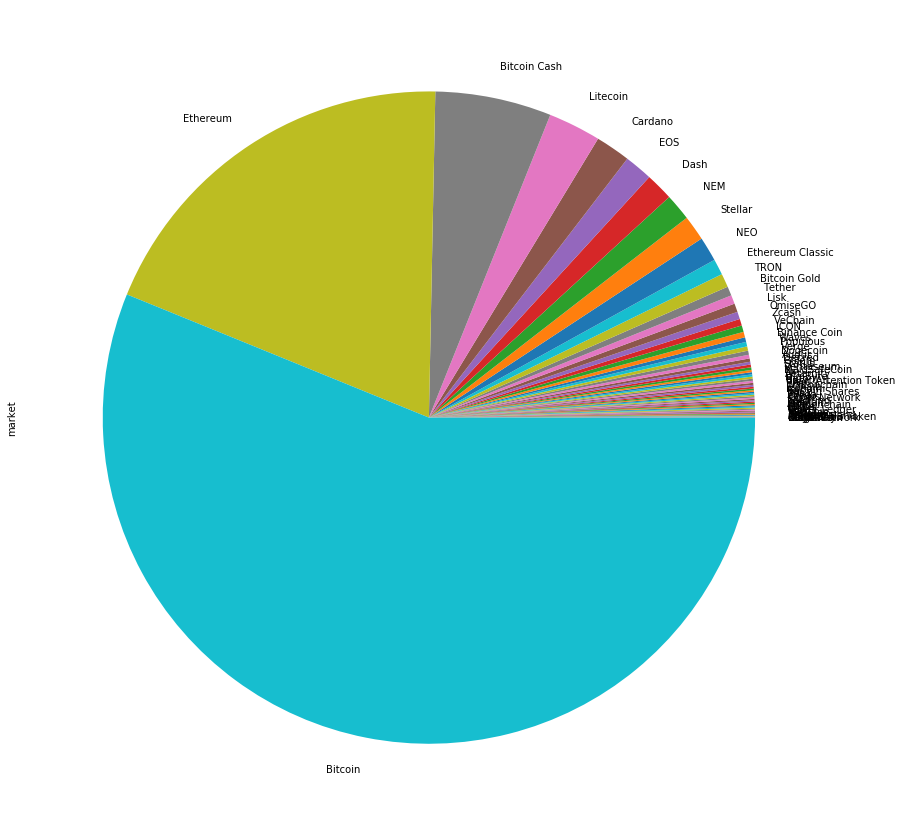

In [81]:
sum_of_markets = coins.groupby(['name'])['market'].agg(sum).sort_values(kind = 'quicksort')
print ('Maximum summary market: ')
print (sum_of_markets[sum_of_markets == sum_of_markets.max()])
print ('\nMinimum summary market: ')
print (sum_of_markets[sum_of_markets == sum_of_markets.min()])
sum_of_markets.plot.pie(figsize = (15, 15))
del sum_of_markets

## 2. Визуализация (1 балл)

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

#### Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.
На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать matplotlib.finance.candlestick_ohlc (mpl_finance.candlestick_ohlc), но можно и без него.

In [98]:
def plot_fancy_price_action(coins, symbol, start_date, end_date):
    df = coins.loc[
        (coins['symbol'] == symbol),
        ['open', 'high', 'low', 'close']
    ][start_date: end_date]
    print(df)

    '''f1 = plt.subplot2grid((6, 4), (1, 0), rowspan=6, colspan=4, axisbg='#07000d')
    candlestick_ohlc(f1, df.values, width=.6, colorup='#53c156', colordown='#ff1717')
    f1.xaxis_date()
    f1.xaxis.set_major_formatter(mpl.dates.DateFormatter('%y-%m-%d'))

    plt.xticks(rotation=45)
    plt.ylabel('Stock Price')
    plt.xlabel('Date Hours:Minutes')
    plt.show()'''

Посмотрим, что получилось:

In [99]:
plot_fancy_price_action(coins=coins, symbol='VERI', start_date='2013-06-01', end_date='2019-06-30') 

              open    high         low       close
date                                              
2017-06-08   48.96  253.27   33.710000   48.560000
2017-06-09   49.18  259.75   47.150000   58.610000
2017-06-10   58.58   84.49    3.160000    3.160000
2017-06-11    3.35  112.39    0.000337    0.000338
2017-06-12   34.22  329.42   11.910000   23.300000
2017-06-13   38.43  252.32   15.390000   54.150000
2017-06-14   38.68  106.85   11.680000   48.000000
2017-06-15   47.99  143.87   28.580000   78.910000
2017-06-16   46.21   85.20   28.250000   47.630000
2017-06-17   48.57  214.17   42.360000   74.510000
2017-06-18   74.44  120.16   57.110000   80.060000
2017-06-19   71.05  355.37   70.460000  153.590000
2017-06-20  182.19  182.19   34.750000  125.650000
2017-06-21  125.79  425.01   69.710000  101.430000
2017-06-22  102.20  112.83   72.420000  101.090000
2017-06-23   96.25  109.77   81.780000   88.080000
2017-06-24   91.33  101.99   65.100000   91.280000
2017-06-25   81.98  137.37   76

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс (1 балл)
Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - pump'n'dump (накачка и сброс). Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются
вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде
успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

#### Ваша задача найти самый сильный pump'n'dump монеты на заданном промежутке времени. Для этого для каждого дня определим число pnd равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день когда pnd был максимален и величину pnd.

In [160]:
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
    end_date = (pd.to_datetime(end_date) + pd.to_timedelta('1 days')).strftime('%Y-%m-%d')
    df = coins.loc[
        (coins['symbol'] == symbol),
        ['open', 'high', 'low', 'close']
    ][start_date: end_date]
    df['pnd'] = df['high'] / df[['open','close']].max(axis = 1)
    ans = df['pnd'][df['pnd'] == df['pnd'].max()]
    return (ans.axes[0][0],ans[ans.axes[0][0]])
    

In [161]:
find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2013-04-28', end_date='2018-06-07')

('2015-11-04', 1.2041014675867432)

#### Сравните эти значения для разных монет.

           PnD's
VERI   33.549254
DGB    32.119149
FUN    12.490562
TRX     9.651010
BTM     7.177933
BTG     5.777033
RHOC    5.075208
DASH    4.782427
LRC     4.528409
PIVX    4.384741
PPT     3.720798
XVG     3.200000
MANA    2.970278
DOGE    2.896321
ICN     2.586337
NEO     2.375906
LSK     2.354730
SRN     1.891649
VTC     1.874074
KNC     1.851924
DCR     1.805444
BCH     1.783945
XLM     1.770858
AE      1.748294
ANT     1.733668
CVC     1.726167
GNT     1.688212
MTL     1.672854
QASH    1.665838
GNO     1.653660
...          ...
POLY    1.455377
LTC     1.454907
XEM     1.445205
ZEC     1.419289
MAID    1.418541
SNT     1.386163
ETHOS   1.369840
POWR    1.364169
AION    1.362416
ENG     1.361868
PAY     1.351402
OMG     1.331215
KCS     1.324376
EOS     1.320293
ADA     1.290640
ELF     1.280899
ETC     1.278986
VEN     1.271357
ZRX     1.254990
ICX     1.253846
ETH     1.250883
BAT     1.234249
SALT    1.227207
DRGN    1.211765
BTC     1.204101
CENNZ   1.177753
BNB     1.1760

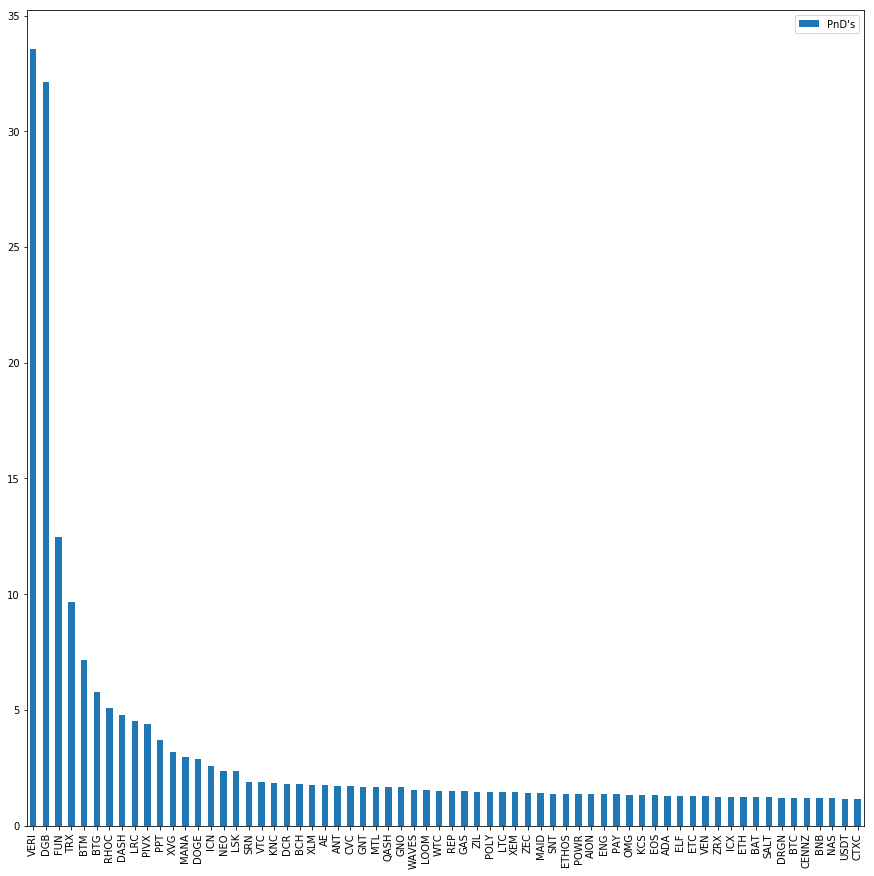

In [178]:
start = coins.axes[0][0]
end = coins.axes[0][len(coins) - 1]
symbols = coins['symbol'].unique()
pnds = []
for symbol in symbols: 
    pnds.append(find_most_severe_pump_and_dump(coins, symbol, start, end)[1])
data = pd.DataFrame(
    data = pnds,
    columns = ['PnD\'s'],
    index = symbols
)
data = data.sort_values(by=['PnD\'s'], kind='quicksort', ascending=False)
print(data)
data.plot.bar(figsize = (15, 15))


## 4. Окупаемость инвестиций (1 балл)

#### Вам нужно посчитать окупаемость инвестиций в криптовалюты на заданном промежутке времени. Окупаемость определяется как отношение изменения цены портфеля к исходной цене портфеля. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.
investments - dict в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD)

In [21]:
def compute_roi(coins, investments, start_date, end_date):
    # Paste your code here

In [ ]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

In [ ]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

## 5. Технический анализ (1 балл)

Технический анализ это способ предсказания поведения графика по некоторым вспомогательным величинам построенным по исходному графику. Один из простейших методов технического анализа - границы Болинджера. Кто-то верит, что график касаясь границы от него должен отражаться.

#### Нарисуйте график цены, скользящее среднее и [границы Боллинджера](https://en.wikipedia.org/wiki/Bollinger_Bands) c параметрами N (window) = 21, K (width) = 2.

Границы считаются очень просто: (MA + Kσ) и (MA - Kσ), где MA - скользящее среднее за N дней, а σ - скользящее стандартное отклонение за N дней.

Тут вам поможет функция rolling для подсчёта среднего и стандартного отклонения по скользящему окну.

Не забудьте подписать график и оси, отрисовать легенду и выбрать для нее лучшее расположение.

In [24]:
def plot_bollinger_bands(coins, symbol, window, width):
    # Paste your code here

In [ ]:
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)  # тут должен появиться график

#### Сделайте вывод о том, выполнялось ли правило Боллинджера.

## 6. Капитализация как индикатор (1 балл)

Многие люди, которые торгуют криптовалютой, любят смотреть на капитализацию. Давайте поймём почему.

#### Нарисуйте еще два графика. На первом должна быть общая капитализация биткойна (BTC), эфира (ETH), еос (EOS), биткойн кэша (BCH), стеллара (XLM) и лайткойна (LTC). На втором - доли капитализаций этих монет от общей капитализации рынка. При этом используйте данные начиная с 2017-07-01.

In [26]:
def plot_coins_capitalizations(coins, symbols, start_date):
    # Paste your code here

In [ ]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

#### Проанализируйте зависимость доли капитализации альткойнов от доли капитализации биткойна. Как выдумаете, в чём причина такой зависимости?

## 7. Корреляции монет (1 балл)

#### Теперь нужно подробнее посмотреть на корреляции средних капитализаций монет. При этом будем смотреть на среднее сглаженное за последние window дней до дня date с коэффициентом сглаживания alpha для набора монет symbols.  
#### Реализуйте функцию, которая будет возвращать квадратный DataFrame с числом строк и столбцов равным числу рассматриваемых монет и со значениями корреляций.

In [28]:
def calc_coins_correlations(coins, date, symbols, window, alpha):
    # Paste your code here

In [ ]:
correlations = calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

Довольно интересно ещё взглянуть на 2017-12-27:

In [ ]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

## 8. Анализ одной стратегии (2 балла)

Разберем один мечтательный пример. Посмотрим какую прибыль могла бы нам принести хрестоматийная торговая стратегия основанная на скользящих средних. Стратегия выглядит следующим образом: мы строим две скользящие среднии для графика цены. С маленьким окном (ведущее скользящее среднее) и с бОльшим окном (запаздывающее скользящее среднее). Мы покупаем, когда ведущее среднее становится больше запаздывающего, и продаем в противном случае. Посмотрим на пример

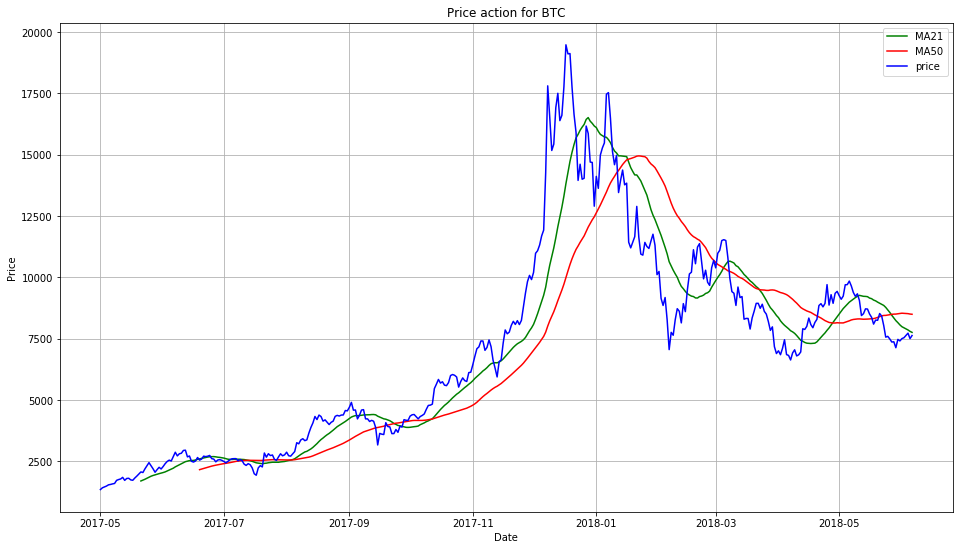

In [31]:
def plot_moving_averages(coins, symbol, leading_window, lagging_window, start_date, end_date):
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    price = coin['price']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)
    
    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    plt.show() 

plot_moving_averages(
    coins=coins, 
    symbol='BTC', 
    leading_window=21, 
    lagging_window=50, 
    start_date='2017-05-01',
    end_date='2018-08-01')

Видно, что для скользящее среднее с бОльшим окном медленнее реагирует на изменение цены. Именно на этой идее и основана торговая стратегия.
#### Реализуйте функцию, которая строит два графика. На правом будут изображены цена и скользящие средние. На левом - во сколько раз изменится размер вложений при использовании нашей стратегии и при обычном инвестировании 

#### Notes:
Давайте использовать только цены закрытия. При этом, чтобы узнать цены за вчерашний день, стоит использовать метод shift(1) у Series.
Отношение цен закрытия за сегодня и за вчера - это мой multiplier за сегодняшний день. При этом давайте строить графики накопления для multipliers. Т.е. если мы смотрим на 3 дня и в первый день multiplier = 1.5, во второй- 0.5 и в третий 2. То график будет выглядеть так: (1.5, 1.5 * 0.5, 1.5 * 0.5 * 2).

При использовании нашей новой стратегии мы будем либо покупать, если ведущее среднее становится больше запаздующего на некоторый threshold (при этом лучше разницу сперва поделить на цену), либо оставлять всё как есть. При этом, конечно, нужно, принимая решения за сегодняшний день, смотреть только на статистику из прошлого.

In [32]:
def plot_moving_averages_strategy(
    coins, symbol, lead_window, lag_window, threshold, start_date, end_date
):
    # Paste your code here

In [ ]:
# Теперь на основе реализованной функции сделаем интерактивные графики и поизучаем, что получилось:
symbol_selector = ipywidgets.Dropdown(
    options=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'),
    index=0,
    value='BTC',
    layout={'width': '700px'},
    continuous_update=False
)

lead_window_slider = ipywidgets.IntSlider(
    value=21, 
    min=1, 
    max=200, 
    step=1,
    layout={'width': '700px'},
    continuous_update=False)

lag_window_slider = ipywidgets.IntSlider(
    value=50,
    min=1, 
    max=200, 
    layout={'width': '700px'},
    step=1, continuous_update=False)

threshold_slider = ipywidgets.FloatSlider(
    min=0, 
    max=0.20, 
    step=0.001, 
    value=0.025,
    layout={'width': '700px'},
    continuous_update=False)

start_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2017-05-01'),
    layout={'width': '700px'},
    continuous_update=False
)

end_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2018-01-01'),
    layout={'width': '700px'},
    continuous_update=False
)

ipywidgets.interact(
    plot_moving_averages_strategy,
    coins=ipywidgets.fixed(coins),
    symbol=symbol_selector,
    lead_window=lead_window_slider,
    lag_window=lag_window_slider,
    threshold=threshold_slider,
    start_date=start_date_slider,
    end_date=end_date_slider
)

#### Попробуйте разные значения параметров для разных монет и сделайте выводы о применимости такой модели.

## 9. Отказ от ответственности 
Все примеры разобранных здесь стратегий являются игрушечными и не подходят для реальной торговли на бирже. Без серьезной подготовки вас там съедят с потрохами.

![Disclamer](https://i0.kym-cdn.com/entries/icons/mobile/000/024/785/Screen_Shot_2017-11-30_at_1.12.37_PM.jpg)